In [1]:
import sys # required for relative imports in jupyter lab
sys.path.insert(0, '../') 

from cosmosis.model import tv_model
from cosmosis.learning import Learn, Selector
from cosmosis.dataset import LoadImage, AsTensor, Transpose
import cosmosis.dataset as dataset

from dataset import Ranzcr
from learning import RSelector

from torch.optim import Adam
from torch.nn import BCEWithLogitsLoss, CrossEntropyLoss
from torch.optim.lr_scheduler import ReduceLROnPlateau
from torchvision import transforms

from IPython.display import display


CDataset created...
CDataset created...
CDataset created...
TorchVision model resnet18 loaded...
learning time: 0:00:42.640565
epoch: 0, lr: 0.01
train loss: 2.263967649788676, val loss: 1.8965187427387176
sk_metric: 
0.6403350437533881
learning time: 0:01:23.703682
epoch: 1, lr: 0.01
train loss: 1.1920777480263496, val loss: 2.560504921942232
sk_metric: 
0.5976136846640195
learning time: 0:02:05.067287
epoch: 2, lr: 0.01
train loss: 1.3891092989420335, val loss: 3.583395985958543
sk_metric: 
0.4204678551210851
learning time: 0:02:46.385476
epoch: 3, lr: 0.005
train loss: 1.5045485638916338, val loss: 2.1842281394423453
sk_metric: 
0.7304941183920902
learning time: 0:03:27.417166
epoch: 4, lr: 0.005
train loss: 1.762365566919713, val loss: 2.1164426160344676
sk_metric: 
0.5898525904115247
learning time: 0:04:08.463576
epoch: 5, lr: 0.005
train loss: 1.1789689961199958, val loss: 1.288093185224009
sk_metric: 
0.45312037325708043
learning time: 0:04:49.612934
epoch: 6, lr: 0.005
train lo

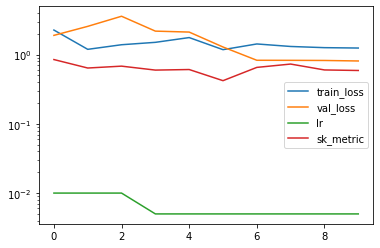

In [2]:
ds_params={'train_params': {'embed': [],
                            'image_dir': './data/ranzcr/train',
                            'target_csv': './data/ranzcr/train.csv',
                            'target_type': 'ETT',
                            'transform': transforms.Compose([LoadImage(),
                                                             transforms.RandomRotation(10),
                                                             transforms.Resize(1500),
                                                             transforms.CenterCrop(1200),
                                                             transforms.Resize(300),
                                                             transforms.RandomCrop(244),
                                                             transforms.ToTensor(),
                                                             ]),
                            'target_transform': transforms.Compose([
                                                       #dataset.DType('int64'),
                                                       dataset.AsTensor(),
                                                       dataset.Squeeze()])},
           'val_params': {'embed': [],
                          'image_dir': './data/ranzcr/train',
                          'target_csv': './data/ranzcr/train.csv',
                          'target_type': 'ETT',
                          'transform': transforms.Compose([LoadImage(),
                                                           transforms.Resize(1500),
                                                           transforms.CenterCrop(1200),
                                                           transforms.Resize(300),
                                                           transforms.CenterCrop(244),
                                                           transforms.ToTensor(),
                                                           ]),
                          'target_transform': transforms.Compose([
                                                       #dataset.DType('int64'),
                                                       dataset.AsTensor(),
                                                       dataset.Squeeze()])},
           'test_params': {'embed': [],
                           'image_dir': './data/ranzcr/train',
                           'target_csv': './data/ranzcr/train.csv',
                           'target_type': 'ETT',
                           'transform': transforms.Compose([LoadImage(),
                                                            transforms.Resize(1500),
                                                            transforms.CenterCrop(1200),
                                                            transforms.Resize(300),
                                                            transforms.CenterCrop(244),
                                                            transforms.ToTensor(),
                                                            ]),
                          'target_transform': transforms.Compose([
                                                       #dataset.DType('int64'),
                                                       dataset.AsTensor(),
                                                       dataset.Squeeze()])}}

model_params = {'model_name': 'resnet18',
                'in_channels': 1,
                'tv_params': {'num_classes': 4}} 

metrics_params = {'report_interval': 10, 
                  'sk_metric_name': 'roc_auc_score', 
                  'sk_params': {'average': 'macro',
                                'multi_class': 'ovr'}}
    
opt_params = {'lr': 0.01}
crit_params = {'reduction': 'sum'}

#RSelector balances classes (target_type) of the Ranzcr ds
sample_params = {'set_seed': False,
                 'splits': (.7,.15),
                 'target_type': 'ETT'}

sched_params = {'factor': .5,
                'patience': 2,
                'cooldown': 2}

l = Learn([Ranzcr,Ranzcr,Ranzcr], 
          tv_model, 
          RSelector, 
          Optimizer=Adam, 
          Scheduler=ReduceLROnPlateau, 
          Criterion=CrossEntropyLoss, 
          model_params=model_params, ds_params=ds_params, sample_params=sample_params,
          opt_params=opt_params, sched_params=sched_params, crit_params=crit_params,
          metrics_params=metrics_params,
          adapt=False, load_model=False, load_embed=False, save_model=False,
          batch_size=16, epochs=10)

In [ ]:
ds_params={'train_params': {'embed': [],
                            'image_dir': './data/ranzcr/train',
                            'target_csv': './data/ranzcr/train.csv',
                            'target_type': 'ETT',
                            'transform': transforms.Compose([LoadImage(),
                                                             #transforms.RandomRotation(10),
                                                             #transforms.Resize((1500)),
                                                             #transforms.CenterCrop(1200),
                                                             #transforms.Resize((300)),
                                                             #transforms.CenterCrop(244),
                                                             #transforms.ToTensor(),
                                                             #transforms.Normalize(0.3,0.3),
                                                             #transforms.ToPILImage(),
                                                             ]),
                            'target_transform': AsTensor()}}

ranzcr = Ranzcr(**ds_params['train_params'])

In [ ]:
ranzcr.ds_idx[0]

In [ ]:
ranzcr['1.2.826.0.1.3680043.8.498.86119358030110783442164990675803210852']

In [ ]:
display(ranzcr['1.2.826.0.1.3680043.8.498.86119358030110783442164990675803210852'][0])

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('./data/ranzcr/train.csv', header=0, index_col=0)

In [ ]:
df.describe()

In [ ]:
df.loc['1.2.826.0.1.3680043.8.498.12976413966762576562651637188467814800']

In [ ]:
print(df.shape)
df.iloc[0]

In [ ]:
pos = df.loc[(df.iloc[:,3] == 1) & (df.iloc[:,4] == 0) & (df.iloc[:,5] == 0) & (df.iloc[:,6] == 1)]
pos
#neg = df.loc[df.iloc[:,:3] == 0].sample(pos.shape[0])
#neg.shape


In [ ]:
pos

In [ ]:
import numpy as np

In [ ]:
df = pd.read_csv('./data/ranzcr/train.csv', header=0, index_col=0)

In [ ]:

s0 = list(df.loc[(df.iloc[:,0] == 1)].index.to_numpy())
cut1 = int(len(s0)*.7)
cut2 = int(len(s0)*.15)
s0train = s0[:cut1]
s0train = np.random.choice(s0train, 128, replace=True)
s0val = s0[cut1:cut1+cut2]
s0test = s0[cut1+cut2:]

s1 = list(df.loc[(df.iloc[:,1] == 1)].index.to_numpy())
cut1 = int(len(s1)*.7)
cut2 = int(len(s1)*.15)
s1train = s1[:cut1]
s1train = np.random.choice(s1train, 256, replace=False)
s1val = s1[cut1:cut1+cut2]
s1test = s1[cut1+cut2:]

s2 = list(df.loc[(df.iloc[:,2] == 1)].index.to_numpy())
cut1 = int(len(s2)*.7)
cut2 = int(len(s2)*.15)
s2train = s2[:cut1]
s2train = np.random.choice(s2train, 512, replace=False)
s2val = s2[cut1:cut1+cut2]
s2test = s2[cut1+cut2:]

s3 = list(df.loc[(df.iloc[:,0] == 0) & (df.iloc[:,1] == 0) & (df.iloc[:,2] == 0)].index.to_numpy())
cut1 = int(len(s3)*.7)
cut2 = int(len(s3)*.15)
s3train = s3[:cut1]
s3train = np.random.choice(s3train, 1024, replace=False)
s3val = s3[cut1:cut1+cut2]
s3test = s3[cut1+cut2:]

train_idx = np.concatenate([s0train,s1train,s2train,s3train])
val_idx = np.concatenate([s0val,s1val,s2val,s3val])
test_idx = np.concatenate([s0test,s1test,s2test,s3test])


In [ ]:
arr = np.asarray([0,0,0])
res = np.where(arr == 1)[0] + 1
len(res)